In [14]:
#1 import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<!-- Install the scikit-learn library.
Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.
Clean your data so that it’s ready for analysis.
Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

State your hypothesis in a markdown cell within your Jupyter notebook.

Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

Split the data into two sets: a training set and a test set.
Run a linear regression on the data.
First, fit the model you created to the training set.
Then, create a prediction for y on the test set.
Create a plot that shows the regression line on the test set.
Write your own interpretation of how well the line appears to fit the data in a markdown cell.
Check the model performance statistics—MSE and R2 score.
Compare the predicted y values with the actual y values in a dataframe.
Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias. -->

In [15]:
#2 importing cleaned dataset
df = pd.read_csv(r"C:\Users\Windows\6 - Project\Prepared Data\cleaned_subset.csv", index_col = 0)

In [4]:
df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating
0,1419,1565,Little Portugal,43.64590,-79.42423,Entire home/apt,120.0,28,6,2017-08-07,0.06,1,0,0,5.00
1,26654,113345,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,145.0,28,42,2023-09-01,0.27,5,77,2,4.79
2,27423,118124,South Riverdale,43.66884,-79.32725,Entire home/apt,75.0,90,28,2023-08-31,0.17,1,215,1,4.93
3,40456,174063,South Parkdale,43.63539,-79.44010,Entire home/apt,150.0,750,113,2023-06-19,0.69,4,364,2,4.64
4,43964,192364,Wexford/Maryvale,43.74922,-79.29188,Entire home/apt,195.0,1,67,2023-09-25,0.78,1,364,13,4.96


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15108 entries, 0 to 15107
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15108 non-null  int64  
 1   host_id                         15108 non-null  int64  
 2   neighbourhood                   15108 non-null  object 
 3   latitude                        15108 non-null  float64
 4   longitude                       15108 non-null  float64
 5   room_type                       15108 non-null  object 
 6   price                           15108 non-null  float64
 7   minimum_nights                  15108 non-null  int64  
 8   number_of_reviews               15108 non-null  int64  
 9   last_review                     15108 non-null  object 
 10  reviews_per_month               15108 non-null  float64
 11  calculated_host_listings_count  15108 non-null  int64  
 12  availability_365                15108

In [21]:
# 3 Data Cleaning
# check missing values  ---> no missing values

df.isnull().sum()

id                                0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
rating                            0
dtype: int64

In [22]:
# check for duplicates  <--- no duplicates
dups = df.duplicated()  
dups.shape

(15108,)

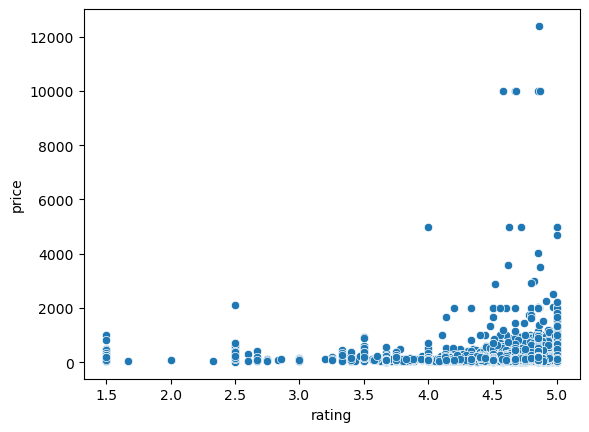

In [6]:
#4 Exploring data visually

scatter_plot = sns.scatterplot(x='rating', y='price', data = df)


#### # 5 Hypothesis: There is a positive correlation between rating and price.  

In [7]:
# 6 Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

X = df['rating'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [8]:
#7 Split the data into two sets: a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [9]:
#8 Run a linear regression on the data.

# create a regression object
regression = LinearRegression()

#Fit the regression to the train set
regression.fit(X_train,y_train)


# create a prediction for y on the test set. 
y_predicted = regression.predict(X_test) 

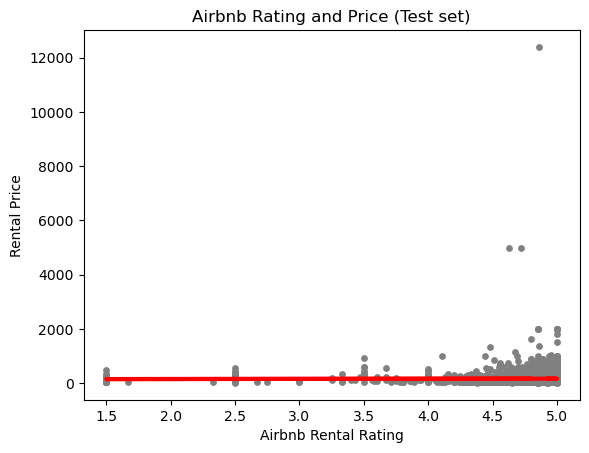

In [16]:
# 9 Create a plot that shows the regression line on the test set.

plt.scatter(X_test, y_test, color='gray', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =3)
plt.title('Airbnb Rating and Price (Test set)')
plt.xlabel('Airbnb Rental Rating')
plt.ylabel('Rental Price')
plt.show()



#### #10 Write your own interpretation of how well the line appears to fit the data in a markdown cell.

#### There appears to be no relationship betwen the two variables. The bulk of the data points are off the line. 

In [17]:
# 11 Check the model performance statistics—MSE and R2 score.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [18]:
 Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.58274007]]
Mean squared error:  66067.54644685594
R2 score:  0.0002542405078356236


#### The performance of the model is poor. The positve slope means a positve relationship. The r-squared value is around 0, showing that the model cannot explain the variance in the data. The MSE is extremely high, meaning that the regression line is very far from data points. Hence, the regression model is very inaccurate.

In [19]:
# 12  Compare the predicted y values with the actual y values in a dataframe.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,120.0,165.382304
1,120.0,165.473958
2,428.0,165.015684
3,70.0,164.144964
4,230.0,165.703095
5,450.0,158.828985
6,100.0,164.374101
7,53.0,162.266040
8,5000.0,164.007481
9,80.0,164.190791


####  13 Include your thoughts on how well the model performed on the test set in a markdown cell.
#### Include any reflections you have on the impact of possible data bias.

#### Based on the data above, it looks like our model is a poor fit for the data. At least, the linear model may not be the ideal selection to build a predictive model. In terms of potential data bias, although we have ~15000 data points (a reasonable amount of data), there are also a number of extreme data points, which could skew the model. 

